 # TP2. Convolutional Neural Networks
 
 #### University Jean-Monnet, 2019-2020

## Part 1. CNN

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers import Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling2D, MaxPooling1D, Embedding
from keras import optimizers

Using TensorFlow backend.


## 1. MNIST Dataset

11493376/11490434 [==============================] - 1s 0us/step
train data:	 (60000, 28, 28) (60000,)
test data:	 (10000, 28, 28) (10000,)


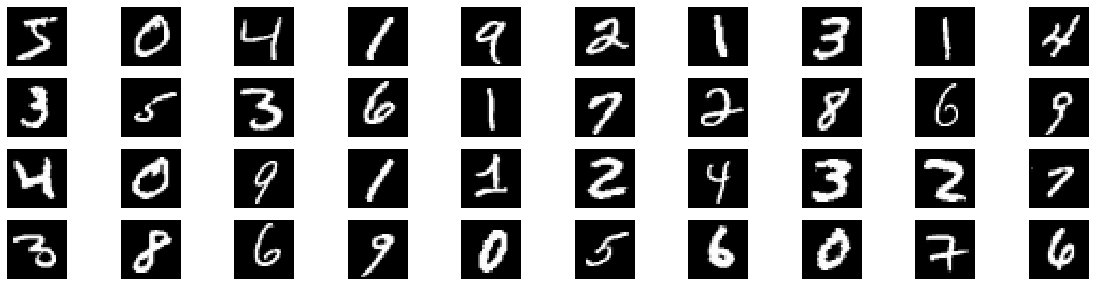

labels:  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6]


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = x_train[i].reshape((28, 28))
    plt.imshow(example, cmap = 'gray')
    plt.axis('off')
plt.show()
print('labels: ', y_train[:40])

X_train_original = x_train
X_test_original = x_test
y_train_original = y_train
y_test_original = y_test

**Exercise 1: Reshape data to size (28 x 28 x 1)** 

In [3]:
print('train data:\t', X_train_original[1])

x_train = X_train_original.reshape(x_train.shape[0], 28, 28, 1)
x_test = X_test_original.reshape(x_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train_original, 10)
y_test = to_categorical(y_test_original, 10)

print('train data:\t', x_train[1])

print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)



train data:	 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 2

**Exercise 2: Write a convolutional neural network model to train MNIST. Objective 99\% accuracy for test set** 

In [4]:
# convert class vectors to binary class matrices
print(y_train[:10])
print(y_train_original[:10])
batch_size = 128
epochs = 12
print('train data:\t', x_train.shape, y_train.shape)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4 1 9 2 1 3 1 4]
train data:	 (60000, 28, 28, 1) (60000, 10)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0       

**Exercise 3. Normalize the input to range [0,1] and see the result**

In [0]:
x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.astype('float32')
x_test/=255

In [6]:
# convert class vectors to binary class matrices
print(y_train[:10])
print(y_train_original[:10])
batch_size = 128
epochs = 12
print('train data:\t', x_train.shape, y_train.shape)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[5 0 4 1 9 2 1 3 1 4]
train data:	 (60000, 28, 28, 1) (60000, 10)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        16192     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)      

## 2. Cifar Dataset

170500096/170498071 [==============================] - 6s 0us/step
train data:	 (50000, 32, 32, 3) (50000, 1)
test data:	 (10000, 32, 32, 3) (10000, 1)


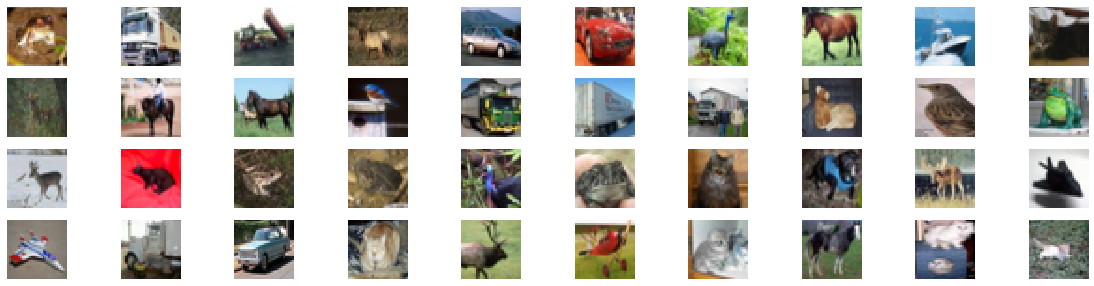

labels:  [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]
 [4]
 [3]
 [6]
 [6]
 [2]
 [6]
 [3]
 [5]
 [4]
 [0]
 [0]
 [9]
 [1]
 [3]
 [4]
 [0]
 [3]
 [7]
 [3]
 [3]]


In [7]:
from keras.datasets import cifar10

cifar = cifar10.load_data()

(x_train, y_train), (x_test, y_test) = cifar
X_train_original = x_train
X_test_original = x_test
y_train_original = y_train
y_test_original = y_test
print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = x_train[i]
    plt.imshow(example)
    plt.axis('off')
plt.show()
print('labels: ', y_train[:40])
# x_train = X_train_original.reshape(x_train.shape[0], 32, 32, 1)
# x_test = X_test_original.reshape(x_test.shape[0], 32, 32, 1)
y_train = to_categorical(y_train_original, 10)
y_test = to_categorical(y_test_original, 10)



**Exercise 4: Write a convolutional neural network model to train Cifar. Objective 85\% accuracy for test set** 

In [8]:
# convert class vectors to binary class matrices
batch_size = 32
epochs = 20
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

KeyboardInterrupt: ignored

**Exercise 5. Normalize the input to range [0,1] and see the result**

In [16]:
x_train = X_train_original
x_test = X_test_original

x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.astype('float32')
x_test/=255

# convert class vectors to binary class matrices
batch_size = 32
epochs = 20
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 64)       

**Exercise 6: Batch normalization is known to improve result. Add batch normalization** 

In [18]:
x_train = X_train_original
x_test = X_test_original

x_train = x_train.astype('float32')
x_train/=255
x_test = x_test.astype('float32')
x_test/=255

# convert class vectors to binary class matrices
batch_size = 32
epochs = 20
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',  input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])
print(model.summary())
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)       

## 3. 1D-Convolutional Neural Networks

**Exercise 7. Redo the text-classification problem in TP1 using 1D-convolutional layers**

In [34]:
import numpy as np
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from keras import optimizers

In [35]:
sentiment_data = pd.read_csv(r"F:\MLDM\3rd Semester\Deep Learning and Applications\Session 1\TP\data\Sentiment.csv")
sentiment_data = sentiment_data[["text", "sentiment"]]
sentiment_data[:10]

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
7,Going on #MSNBC Live with @ThomasARoberts arou...,Neutral
8,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
9,RT @NancyOsborne180: Last night's debate prove...,Negative


In [36]:
sentiment_data = sentiment_data[sentiment_data.sentiment != "Neutral"]
sentiment_data

,text,sentiment
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
5,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
6,RT @warriorwoman91: I liked her and was happy ...,Negative
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [37]:
positive = sentiment_data[sentiment_data.sentiment == "Positive"]
negative = sentiment_data[sentiment_data.sentiment == "Negative"]
print(np.shape(positive))
print(np.shape(negative))

(2236, 2)
(8493, 2)


In [38]:
negative = negative[:2236]
print(np.shape(positive))
print(np.shape(negative))
balanced_sentiment_data = pd.concat([positive, negative])

print(np.shape(balanced_sentiment_data))
balanced_sentiment_data = balanced_sentiment_data.sample(frac=1)
print(balanced_sentiment_data[:10])
data = balanced_sentiment_data

(2236, 2)
(2236, 2)
(4472, 2)
                                                   text sentiment
3541  restorereality: Fuck ya Donald Trump you rocke...  Negative
745   I learned that i cant watch the #GOP before be...  Negative
1034  Not much fact checking of the #GOPDebate becau...  Negative
6416  RT @RandPaul: Rand Paul Is Leading The Fight T...  Positive
262   RT @DanScavino: .@MegynKelly trying 2show up @...  Negative
2133  I wish there was more CGI in the #GOPDebate wh...  Negative
1724  @realDonaldTrump where are your manners? #GOPD...  Negative
1221  Oh, one more thing. Did anyone hear anything a...  Negative
1365  RT @BenjaminJS: Getting more excited for the #...  Positive
417   RT @GovMikeHuckabee: "He was just so eloquent....  Positive


In [39]:
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

In [40]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [41]:
y =  pd.get_dummies(data.sentiment)
# y = to_categorical(y)
print(y[:3])
print(np.shape(y))

      Negative  Positive
3541         1         0
745          1         0
1034         1         0
(4472, 2)


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(np.shape(X_train))
# X_train = X_train.reshape(X_train.shape[0], 29,1)
# X_test = X_test.reshape(X_test.shape[0], 29,1)
print(np.shape(X_train))

(2996, 29)
(2996, 29)


In [168]:
# model = Sequential()
# # model.add(Dense(12, input_dim=29, activation='relu'))
# # model.add(Conv1D(1024, 5, input_shape=(29,1)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(29,1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.1))
# model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(Flatten())

# model.add(Dropout(0.03))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(2, activation='softmax'))


model = Sequential()
model.add(Embedding(5000, 100, input_length=29))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(29,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

    
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train,
          epochs=100,
          batch_size=128)

_, train_acc = model.evaluate(X_train, y_train, batch_size=1000)
_, test_acc = model.evaluate(X_test, y_test, batch_size=1000)
print('train_acc', train_acc)
print('test_acc', test_acc)

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 29, 100)           500000    
_________________________________________________________________
conv1d_101 (Conv1D)          (None, 27, 128)           38528     
_________________________________________________________________
conv1d_102 (Conv1D)          (None, 25, 64)            24640     
_________________________________________________________________
dropout_63 (Dropout)         (None, 25, 64)            0         
_________________________________________________________________
max_pooling1d_49 (MaxPooling (None, 12, 64)            0         
_________________________________________________________________
flatten_36 (Flatten)         (None, 768)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 50)              

Epoch 65/100
2996/2996 [==============================] - 1s 283us/step - loss: 0.0092 - accuracy: 0.9963
Epoch 66/100
2996/2996 [==============================] - 1s 276us/step - loss: 0.0067 - accuracy: 0.9980
Epoch 67/100
2996/2996 [==============================] - 1s 275us/step - loss: 0.0043 - accuracy: 0.9987
Epoch 68/100
2996/2996 [==============================] - 1s 261us/step - loss: 0.0045 - accuracy: 0.9980
Epoch 69/100
2996/2996 [==============================] - 1s 279us/step - loss: 0.0069 - accuracy: 0.9960
Epoch 70/100
2996/2996 [==============================] - 1s 275us/step - loss: 0.0120 - accuracy: 0.9960
Epoch 71/100
2996/2996 [==============================] - 1s 291us/step - loss: 0.0078 - accuracy: 0.9970
Epoch 72/100
2996/2996 [==============================] - 1s 253us/step - loss: 0.0077 - accuracy: 0.9957
Epoch 73/100
2996/2996 [==============================] - 1s 258us/step - loss: 0.0093 - accuracy: 0.9950
Epoch 74/100
2996/2996 [======================